In [1]:
import pandas as pd
import seaborn as sns
from pymer4.models import Lmer
df = pd.read_csv('data/sample data.csv').groupby(['CountryID', 'SchoolID']).apply(
    lambda x: x.sample(frac=0.02, random_state=999)).reset_index(drop=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CountryID,SchoolID,StudentID,Gender,CountryName,CountryCode,Continent,...,Science,IBTEACH,WEALTH,ESCS,School_type,Sch_science_resource,log_science,female,z_sch_resource,z_IBTEACH
0,12461,34745,34745,56,5650027,5651417,Male,Belgium - Rest of the country,BEL,EU,...,586.4260,-1.0435,-0.0739,1.0494,-1.0,5.0,6.374046,-1,0.119012,-1.099643
1,13154,36507,36507,56,5650078,5652526,Female,Belgium - Rest of the country,BEL,EU,...,684.0211,-0.1798,-0.6315,-0.2282,-1.0,6.0,6.527989,1,0.569286,-0.246594
2,59526,196764,196764,352,35200004,35203363,Male,Iceland,ISL,EU,...,474.4032,-0.0748,-0.5411,1.1494,1.0,4.0,6.162058,-1,-0.331262,-0.142889
3,59801,197384,197384,352,35200034,35202216,Female,Iceland,ISL,EU,...,593.7425,0.2049,0.2106,1.6585,1.0,5.0,6.386446,1,0.119012,0.133362
4,59898,197619,197619,352,35200042,35203996,Male,Iceland,ISL,EU,...,448.1137,0.6256,0.3800,1.1325,1.0,5.0,6.105047,-1,0.119012,0.548873


In [ ]:
import formula_creator as mod
mod.main()

### Lmer('log_science ~ WEALTH*female + (1|SchoolID/CountryID)')


In [20]:
trial = Lmer('Reading ~ female + IBTEACH + WEALTH + WEALTH*female + (1|SchoolID/CountryID)', data=df)
trial.fit(REML=False)

/home/rohit000/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


[1] "Model is nearly unidentifiable: large eigenvalue ratio\n - Rescale variables?"
 

Formula: Reading ~ female + IBTEACH + WEALTH + WEALTH*female + (1|SchoolID/CountryID)

Family: gaussian	 Inference: parametric

Number of observations: 273	 Groups: {'CountryID:SchoolID': 224.0, 'SchoolID': 224.0}

Log-likelihood: -1636.021 	 AIC: 3288.042

Random effects:

                           Name       Var     Std
CountryID:SchoolID  (Intercept)  2558.957  50.586
SchoolID            (Intercept)  1243.707  35.266
Residual                         5889.018  76.740

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),459.858,447.241,472.474,6.437,216.421,71.439,0.000,***
female,10.814,-0.830,22.457,5.941,263.257,1.820,0.070,.
IBTEACH,-10.278,-20.655,0.098,5.294,247.609,-1.941,0.053,.
WEALTH,-6.483,-15.599,2.633,4.651,268.302,-1.394,0.165,
female:WEALTH,-2.419,-11.337,6.499,4.550,265.341,-0.532,0.595,


In [21]:
trial.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),459.857712,447.241373,472.474051,6.437026,216.421018,71.439469,1.835285e-152,***
female,10.813790,-0.829532,22.457111,5.940579,263.256777,1.820326,6.984481e-02,.
IBTEACH,-10.278356,-20.655085,0.098372,5.294347,247.609128,-1.941383,5.334634e-02,.
WEALTH,-6.483064,-15.599021,2.632892,4.651084,268.301879,-1.393883,1.645064e-01,
female:WEALTH,-2.419305,-11.337140,6.498531,4.550000,265.341048,-0.531715,5.953680e-01,


In [22]:
trial.ranef_var

,Name,Var,Std
CountryID:SchoolID,(Intercept),2558.957099,50.586135
SchoolID,(Intercept),1243.707081,35.266231
Residual,,5889.017980,76.739937


In [23]:
trial.fixef

[     (Intercept)    female    IBTEACH    WEALTH  female:WEALTH
 0     489.731427  10.81379 -10.278356 -6.483064      -2.419305
 1     506.692600  10.81379 -10.278356 -6.483064      -2.419305
 2     454.533274  10.81379 -10.278356 -6.483064      -2.419305
 3     510.470504  10.81379 -10.278356 -6.483064      -2.419305
 4     479.148516  10.81379 -10.278356 -6.483064      -2.419305
 5     439.117062  10.81379 -10.278356 -6.483064      -2.419305
 6     477.396507  10.81379 -10.278356 -6.483064      -2.419305
 7     484.633262  10.81379 -10.278356 -6.483064      -2.419305
 8     415.704312  10.81379 -10.278356 -6.483064      -2.419305
 9     455.628104  10.81379 -10.278356 -6.483064      -2.419305
 10    497.167637  10.81379 -10.278356 -6.483064      -2.419305
 11    487.254131  10.81379 -10.278356 -6.483064      -2.419305
 12    431.917299  10.81379 -10.278356 -6.483064      -2.419305
 13    491.643143  10.81379 -10.278356 -6.483064      -2.419305
 14    450.355486  10.81379 -10.278356 -

Multiple random effects clusters specified in model. Plotting the 1 one. This can be changed by passing 'ranef_idx = number'


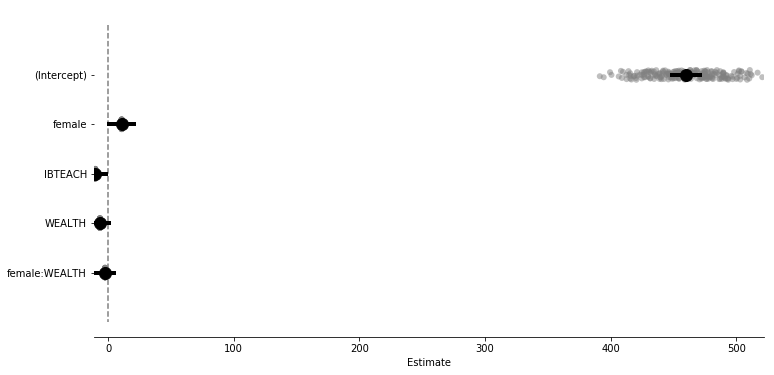

In [24]:
trial.plot_summary()